En ciudades pequeñas, es importante asegurar una distribución adecuada de servicios esenciales como colegios, droguerías, centros médicos, entre otros. Una mala localización puede generar áreas de baja cobertura, afectando la calidad de vida de los habitantes. Para evaluar esta situación, se puede utilizar un modelo espacial que tome en cuenta tanto la localización de los establecimientos existentes como la densidad de población de la ciudad.

Este programa simula un pequeño plano urbano, donde se ubican varios servicios (como droguerías o colegios) y se genera un campo de densidad poblacional, más concentrado en el centro de la ciudad. Utilizando un Diagrama de Voronoi, se delimitan las áreas de influencia de cada establecimiento. Se visualiza gráficamente la combinación de la densidad de población con las regiones de Voronoi, permitiendo identificar posibles zonas donde podría faltar cobertura de servicios, basado en el tamaño de las áreas y la concentración de población.


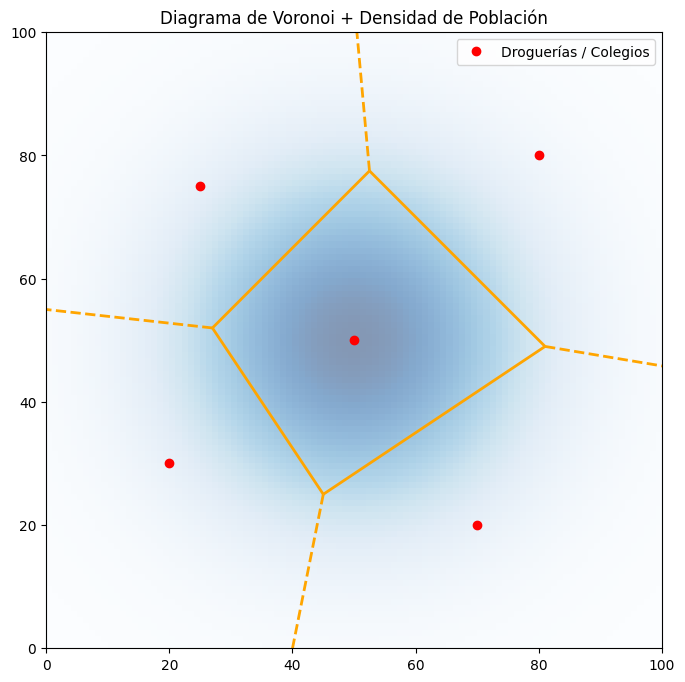

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import cm


city_size = (100, 100)

locations = np.array([
    [20, 30],
    [70, 20],
    [50, 50],
    [80, 80],
    [25, 75]
])

x = np.linspace(0, city_size[0], city_size[0])
y = np.linspace(0, city_size[1], city_size[1])
X, Y = np.meshgrid(x, y)

density = np.exp(-((X - city_size[0]/2)**2 + (Y - city_size[1]/2)**2) / 800)

vor = Voronoi(locations)

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(density, extent=(0, city_size[0], 0, city_size[1]), origin='lower', cmap=cm.Blues, alpha=0.5)

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2)

ax.plot(locations[:,0], locations[:,1], 'ro', label='Droguerías / Colegios')

ax.set_xlim(0, city_size[0])
ax.set_ylim(0, city_size[1])
ax.set_title('Diagrama de Voronoi + Densidad de Población')
ax.legend()
plt.show()
